<a href="https://colab.research.google.com/github/bbchen33/Deep-learning/blob/master/Heart_disease_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd


In [0]:
from google.colab import files

In [36]:
files.upload()

Saving heart-disease-uci.zip to heart-disease-uci.zip


{'heart-disease-uci.zip': b'PK\x03\x04-\x00\x00\x00\x08\x00\xe5\xa1AO\xf0\x08\x12\xa8\xff\xff\xff\xff\xff\xff\xff\xff\t\x00\x14\x00heart.csv\x01\x00\x10\x00@,\x00\x00\x00\x00\x00\x00\xfa\x0c\x00\x00\x00\x00\x00\x00\x8dZK\x8e\x1c\xc9\r\xdd\x0f\xa0\x9b$\n\xc1\xf8\xe4\xe78=r[\x03X\xb0\x84\x91\x16s7/|$_\xc1A\xf2=\x063{\x06\x98\x85\xd4\xd5]\xac\x08~\x1e\xc9Gf\xfd\xef?\xff}\xfb\xf2\xbe\xfdx\xffc\xfb\xfc}\xfb\xf9\xfb\xfb\x8f\x9f\xbf~\xff\xb1}\xfe\xed\xdb\xd7\xed\x9f\xbf\xfe\xd8\xf4\x0f\xef\x9f\xbfl?\x7f{\xfb\xfa\xf6\xf9\xb7\xed\xfd\x8f\xb7\x7f\x7f\xd9\xbe}\xfd\xc7\xf7\xf7\xb7\x7fm?\xbe~\xfb\xfe\xbe}~\xb3\xb7\xb7\x9fo\xbf\x7fy\xff\xf9\xe9\x97\xbdm\xb2\xcd\x7f}l\xb5\xe9\xeb\xb2\xc9(\xf3\xff\xfaj\x9b\xfe\x94M>\xfd\xd2\x8e\xf9\xb3n\xd2\xe6\xdf\x07\xfez\x1e\xf3g{\r\x93\xaa*\xd5\xc5\xdfQ\xa9\xd2\xfd\xd3G\xd5\xff_}\xab\x94\x1a\xbb\xcalR\xe7\xefm\xf7O\x1c\xa7J\xbf\xce$u\xf8\xe7\xa7T\x1b\xdd\xa5L\xd7\xf2\xdaoRvg\x9f\xff\xae\xeaR\xdd\xcf\xea\x9bP\xfb\x81[\xa6T\xbd\xa0\xd7h\xa6\x97[\xec\xda\xf7\xa5\xd7\

In [37]:
!ls

drive  heart-disease-uci.zip  sample_data


In [38]:
!unzip heart-disease-uci.zip


Archive:  heart-disease-uci.zip
  inflating: heart.csv               


In [0]:
data = pd.read_csv('heart.csv')

In [41]:
data.describe()

age         sex          cp  ...          ca        thal      target
count  303.000000  303.000000  303.000000  ...  303.000000  303.000000  303.000000
mean    54.366337    0.683168    0.966997  ...    0.729373    2.313531    0.544554
std      9.082101    0.466011    1.032052  ...    1.022606    0.612277    0.498835
min     29.000000    0.000000    0.000000  ...    0.000000    0.000000    0.000000
25%     47.500000    0.000000    0.000000  ...    0.000000    2.000000    0.000000
50%     55.000000    1.000000    1.000000  ...    0.000000    2.000000    1.000000
75%     61.000000    1.000000    2.000000  ...    1.000000    3.000000    1.000000
max     77.000000    1.000000    3.000000  ...    4.000000    3.000000    1.000000

[8 rows x 14 columns]

In [54]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

All the data features are numerical so there's no need to encode the categorical feature.

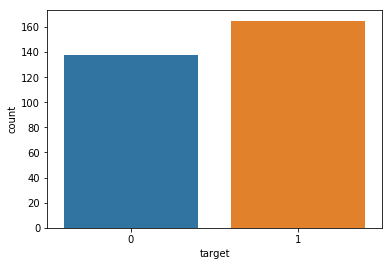

In [42]:
sns.countplot(data.target)

Text(0.5, 0, 'heart disease')

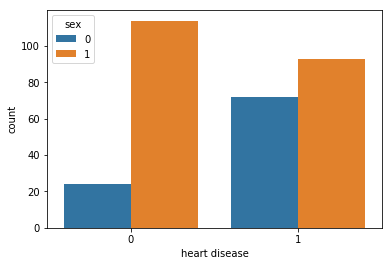

In [47]:
sns.countplot(data.target,hue = data.sex)
plt.xlabel('heart disease')

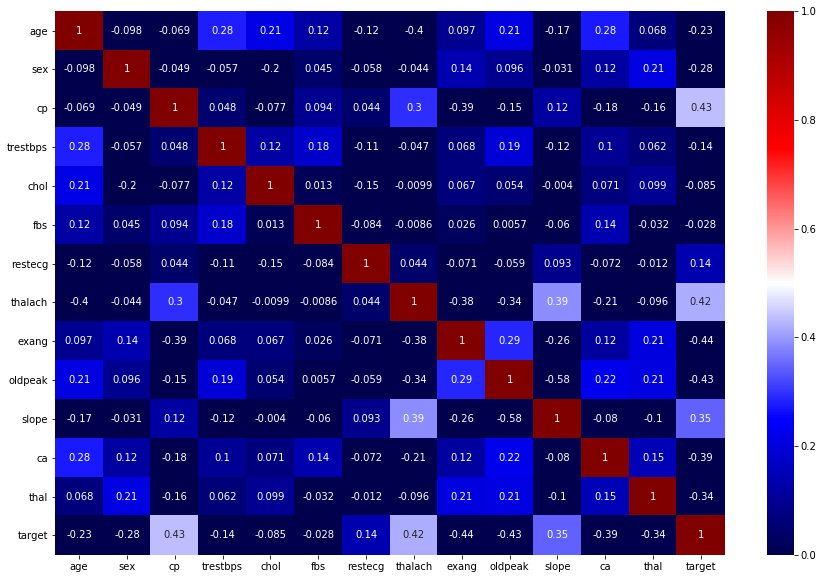

In [53]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(method= 'pearson'), annot = True, vmin = 0, vmax = 1, cmap = 'seismic')

No strong correlation between the features (red being strong and blue being weak)

In [89]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
X = data.drop(['target'], axis =1)
y = data.target
X_std = StandardScaler().fit_transform(X)

print('Before:\n',X.mean(axis = 0),'\nAfter\n',X_std.mean(axis = 0))


Before:
 age          54.366337
sex           0.683168
cp            0.966997
trestbps    131.623762
chol        246.264026
fbs           0.148515
restecg       0.528053
thalach     149.646865
exang         0.326733
oldpeak       1.039604
slope         1.399340
ca            0.729373
thal          2.313531
dtype: float64 
After
 [ 4.69005106e-17 -1.40701532e-16  2.34502553e-17 -7.03507659e-16
 -1.11388713e-16 -2.34502553e-17  1.46564096e-16 -6.80057404e-16
 -4.69005106e-17  2.34502553e-17 -1.40701532e-16 -2.34502553e-17
 -1.64151787e-16]


In [0]:
pca= PCA(n_components = 2)
PCs = pca.fit_transform(X_std)
principalDF = pd.DataFrame(data = PCs, columns = ['PC1','PC2'])

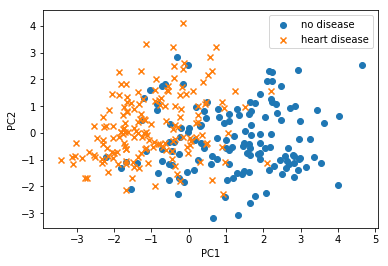

In [98]:
plt.scatter(principalDF.PC1[y==0], principalDF.PC2[y==0], marker = 'o', label= 'no disease')
plt.scatter(principalDF.PC1[y==1], principalDF.PC2[y==1], marker = 'x', label= 'heart disease')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()